<a id="Import"></a>
# <p style="background-color: #0093af; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Heart Disease Detection Model</p>

# <font size= '6' color='DodgerBlue'>Importing Libraries</font>

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import scipy.stats as stats

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# <font size= '6' color='DodgerBlue'>Load & Understand the dataset</font>

In [2]:
data = pd.read_csv('Heart_Disease_Dataset.csv')

# Comma-Separated Values (CSV)
# Age  ,  Name     ,  Target
# 21   ,  John     ,   200
# 22   ,  Sara     ,   500
# 23   ,  Olivia   ,   700

In [3]:
data.shape # Dimensions (rows, columns) "Attribute"

(1025, 14)

In [4]:
data.head(10) # first 10 rows/records  "Method"

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
5   0     2       1  
6   3     1       0  
7   1     3       0  
8   0     3       0  
9   2     2       0

In [5]:
# 1- age (السن | العمر)                            2- sex (الجنس | النوع)
# 3- cp (نوع الألم في الصدر)                         4- trestbps (ضغط الدم اثناء الراحة أو بدون مجهود)
# 5- chol (نسبة الكولسترول لدى الشخص)             6- fbs (نسبة السكر في الدم)
# 7- restecg (نتائج تخطيط كهربية القلب)               8- thalach (الحد الأقصى لمعدل ضربات القلب الذي وصل إليه الشخص)
# 9- exang (ممارسة الذبحة الصدرية المستحثة)           10- oldpeak (المواضع المتعلقة بمخطط تخطيط القلب)
# 11- slope (الانحدار الخاص بمخطط تخطيط القلب)        12- ca (عدد الأوعية الرئيسية)
# 13- thal (نوع الاضطراب في الدم)                    14- target (Yes | No)

### **age:** Age
### **sex:** Sex
### **cp:** Type of chest pain
### **trestbps:** Resting blood pressure
### **chol:** Cholesterol level
### **fbs:** Fasting blood sugar level
### **restecg:** Resting electrocardiographic results
### **thalach:** Maximum heart rate achieved
### **exang:** Exercise-induced angina
### **oldpeak:** ST depression induced by exercise relative to rest
### **slope:** Slope of the peak exercise ST segment
### **ca:** Number of major vessels
### **thal:** Thalassemia (type of blood disorder)
### **target:** Presence of heart disease (Yes/No)

In [6]:
data.tail(10) # last 10 rows/records  "Method"

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1015   58    1   0       128   216    0        0      131      1      2.2   
1016   65    1   3       138   282    1        0      174      0      1.4   
1017   53    1   0       123   282    0        1       95      1      2.0   
1018   41    1   0       110   172    0        0      158      0      0.0   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1015      1   3     3       0  
1016      1   1     2       0  
1017      1   2     3       0  
1018      2   0     3       0  
1019      2   0     2       1  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [7]:
data.columns  # "Attribute"

# It doesn't require parentheses because it's an attribute, not a method.

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
data.dtypes  # "Attribute"

# It doesn't require parentheses because it's an attribute, not a method.

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [9]:
data.info()  # "Method"

# Require parentheses to execute and provide their specific functionality or information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
data.describe().style.background_gradient(cmap='Blues')  # "Method"

# or   data.describe().transpose()

# <font size= '6' color='DodgerBlue'>Handling Missing Values</font>

In [11]:
if data.isnull().values.any():
    print('Unfortunately, there are missing values in the dataset\n') 
else:
    print('Fortunately, there aren\'t missing values in the dataset.')

Fortunately, there aren't missing values in the dataset.


# <font size= '6' color='DodgerBlue'>Handling Outliers</font>

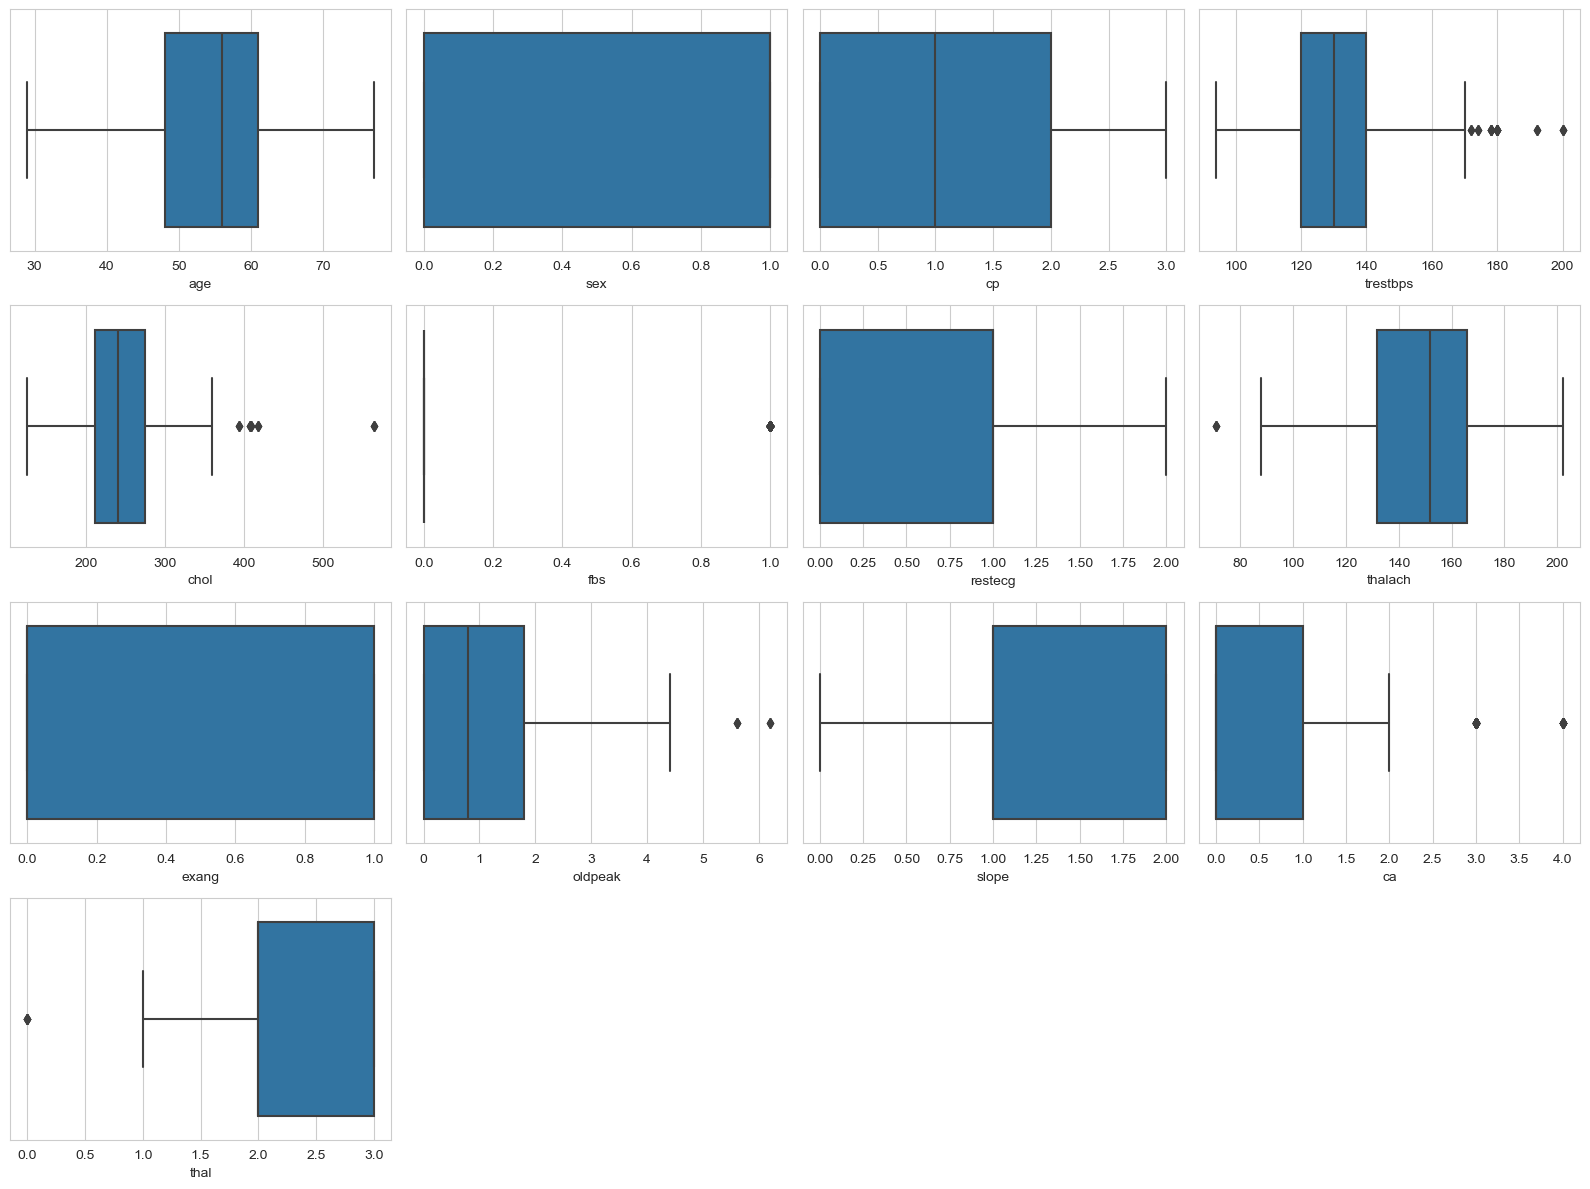

In [12]:
# Outliers = Unusual Values قيم متطرفة
# Univariate Analysis

plt.figure(figsize=(16, 12))
sns.set_style('whitegrid')

# List of columns to plot
columns_to_plot = ['age', 'sex', 'cp', 'trestbps', 'chol', 
                   'fbs', 'restecg', 'thalach', 'exang', 
                   'oldpeak', 'slope', 'ca', 'thal']

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=column, data=data)

plt.tight_layout()
plt.show()

# A box plot displays the distribution of data and can help identify skewness and outliers.
# For normally distributed data, the box plot should be symmetric.

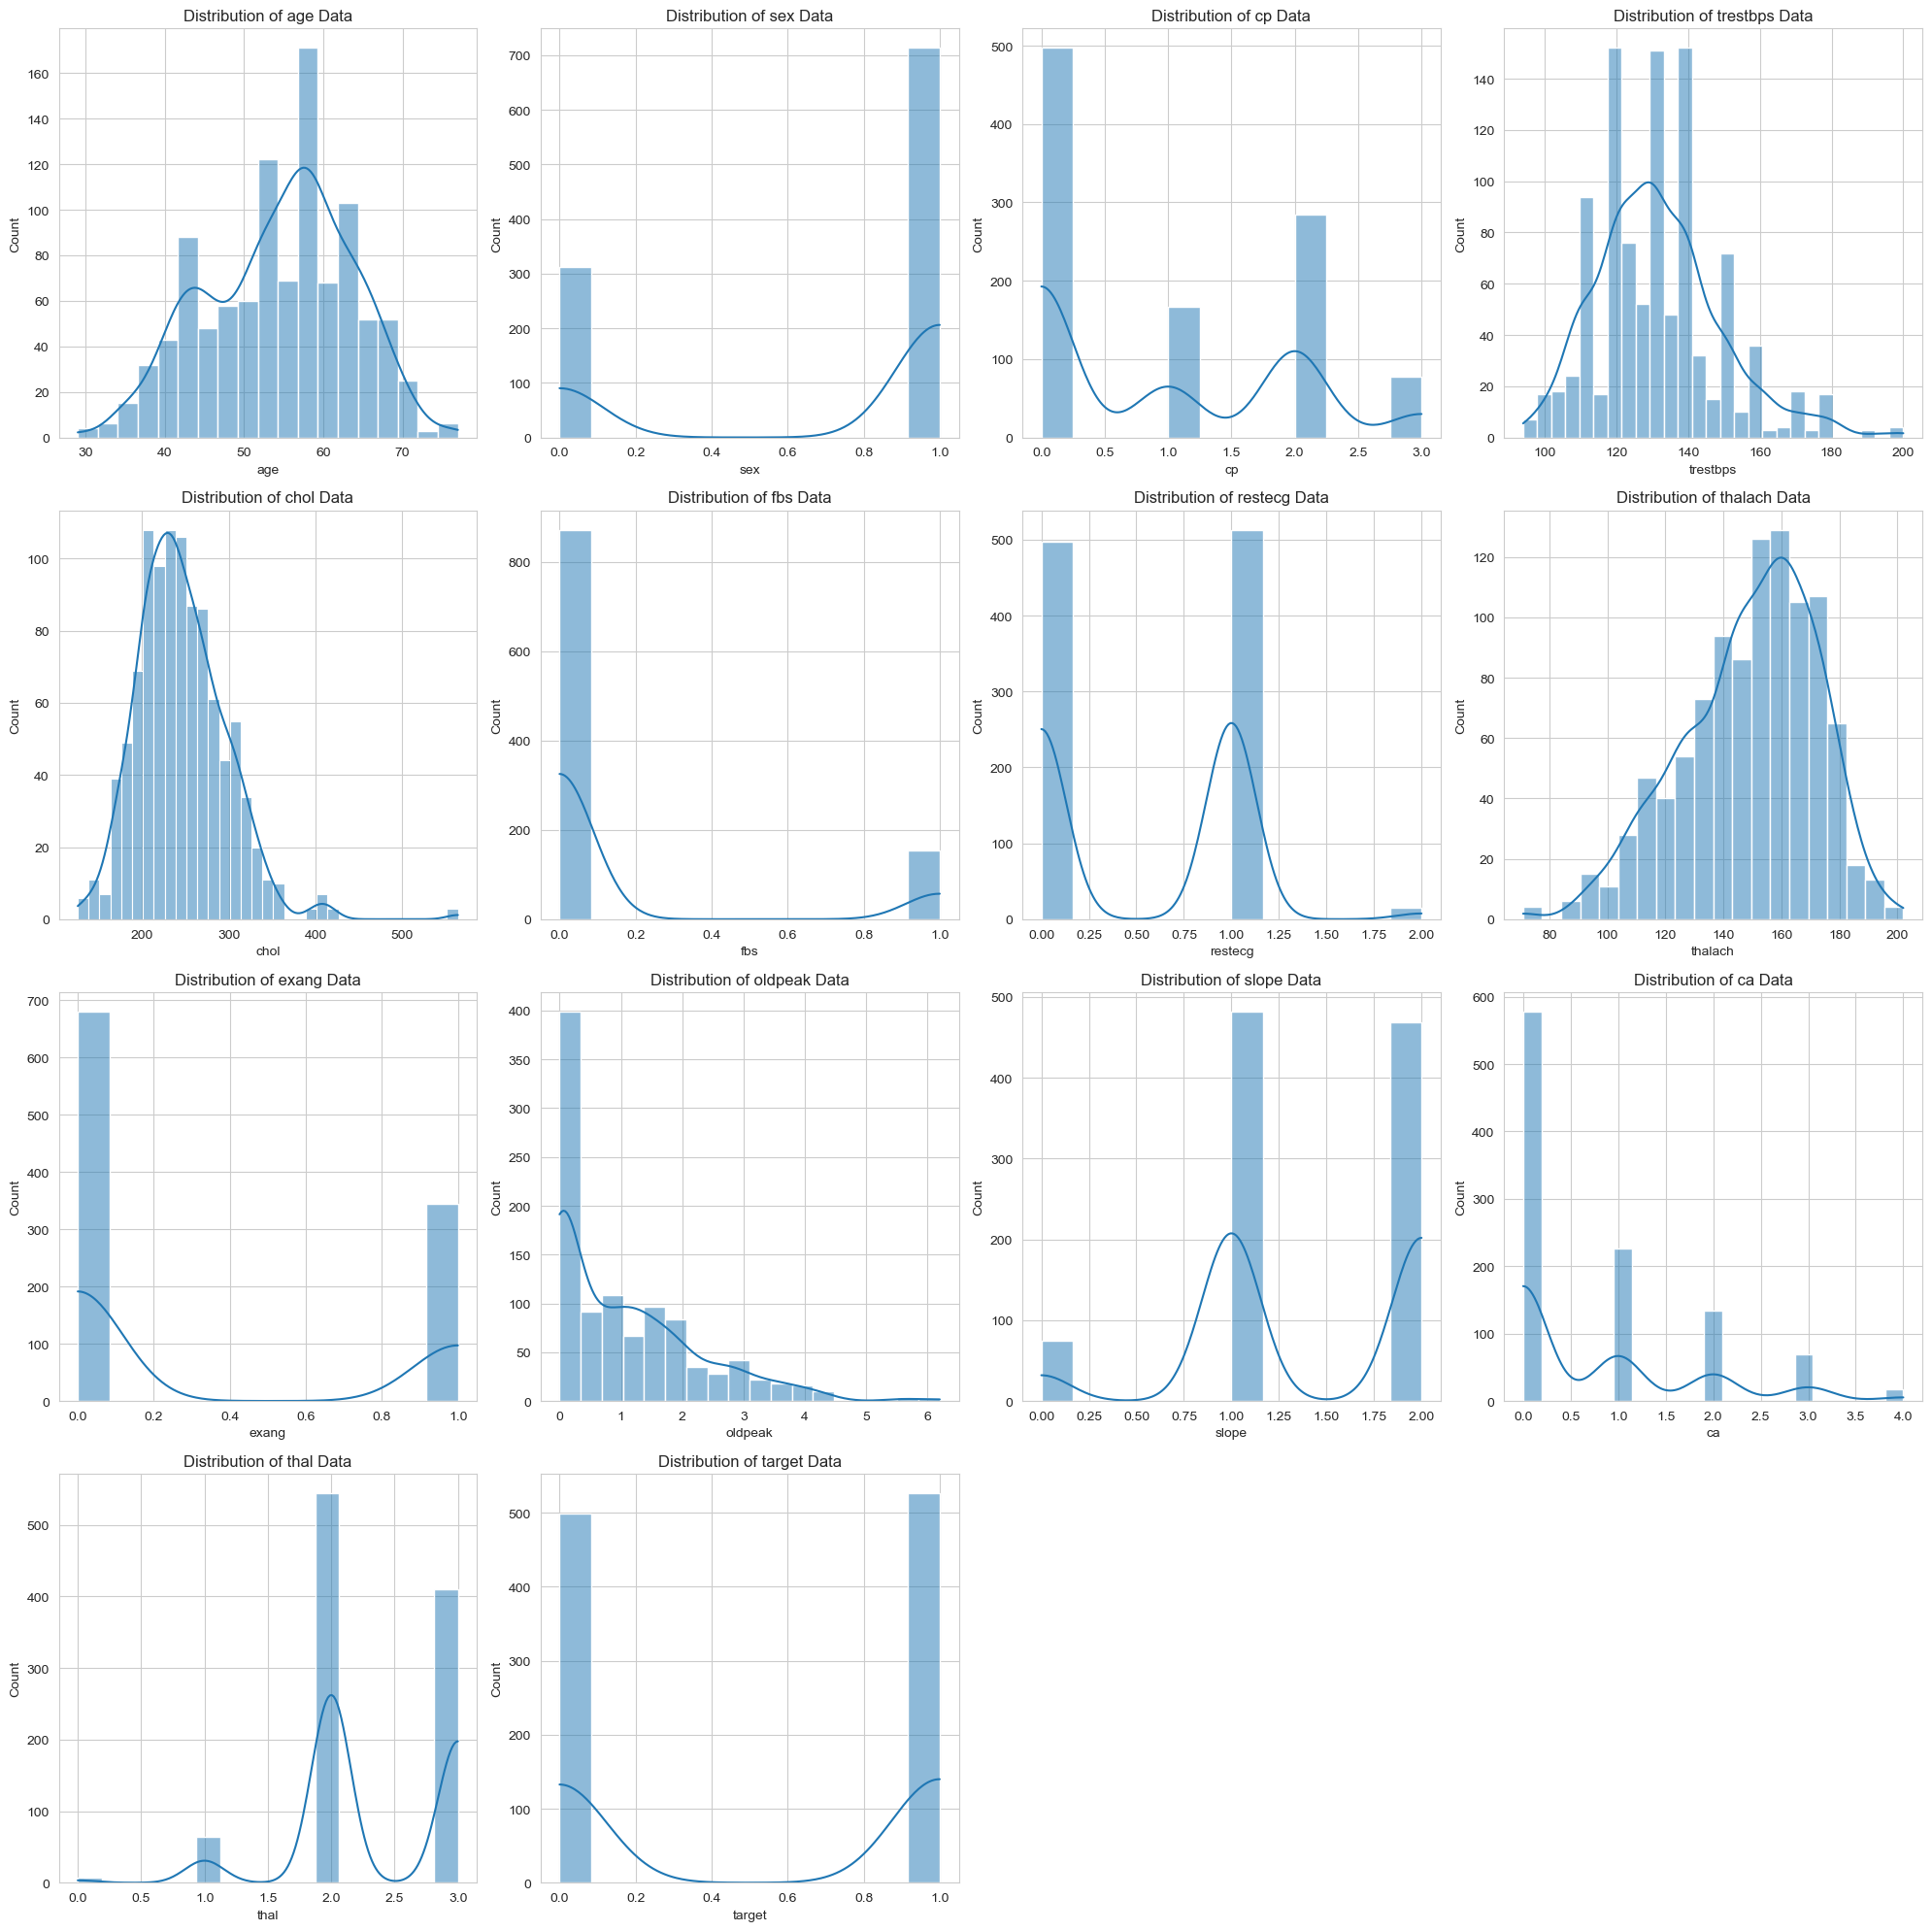

In [13]:
# Histogram for each  feature
# Univariate Analysis

plt.figure(figsize=(20,20))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (969, 14)


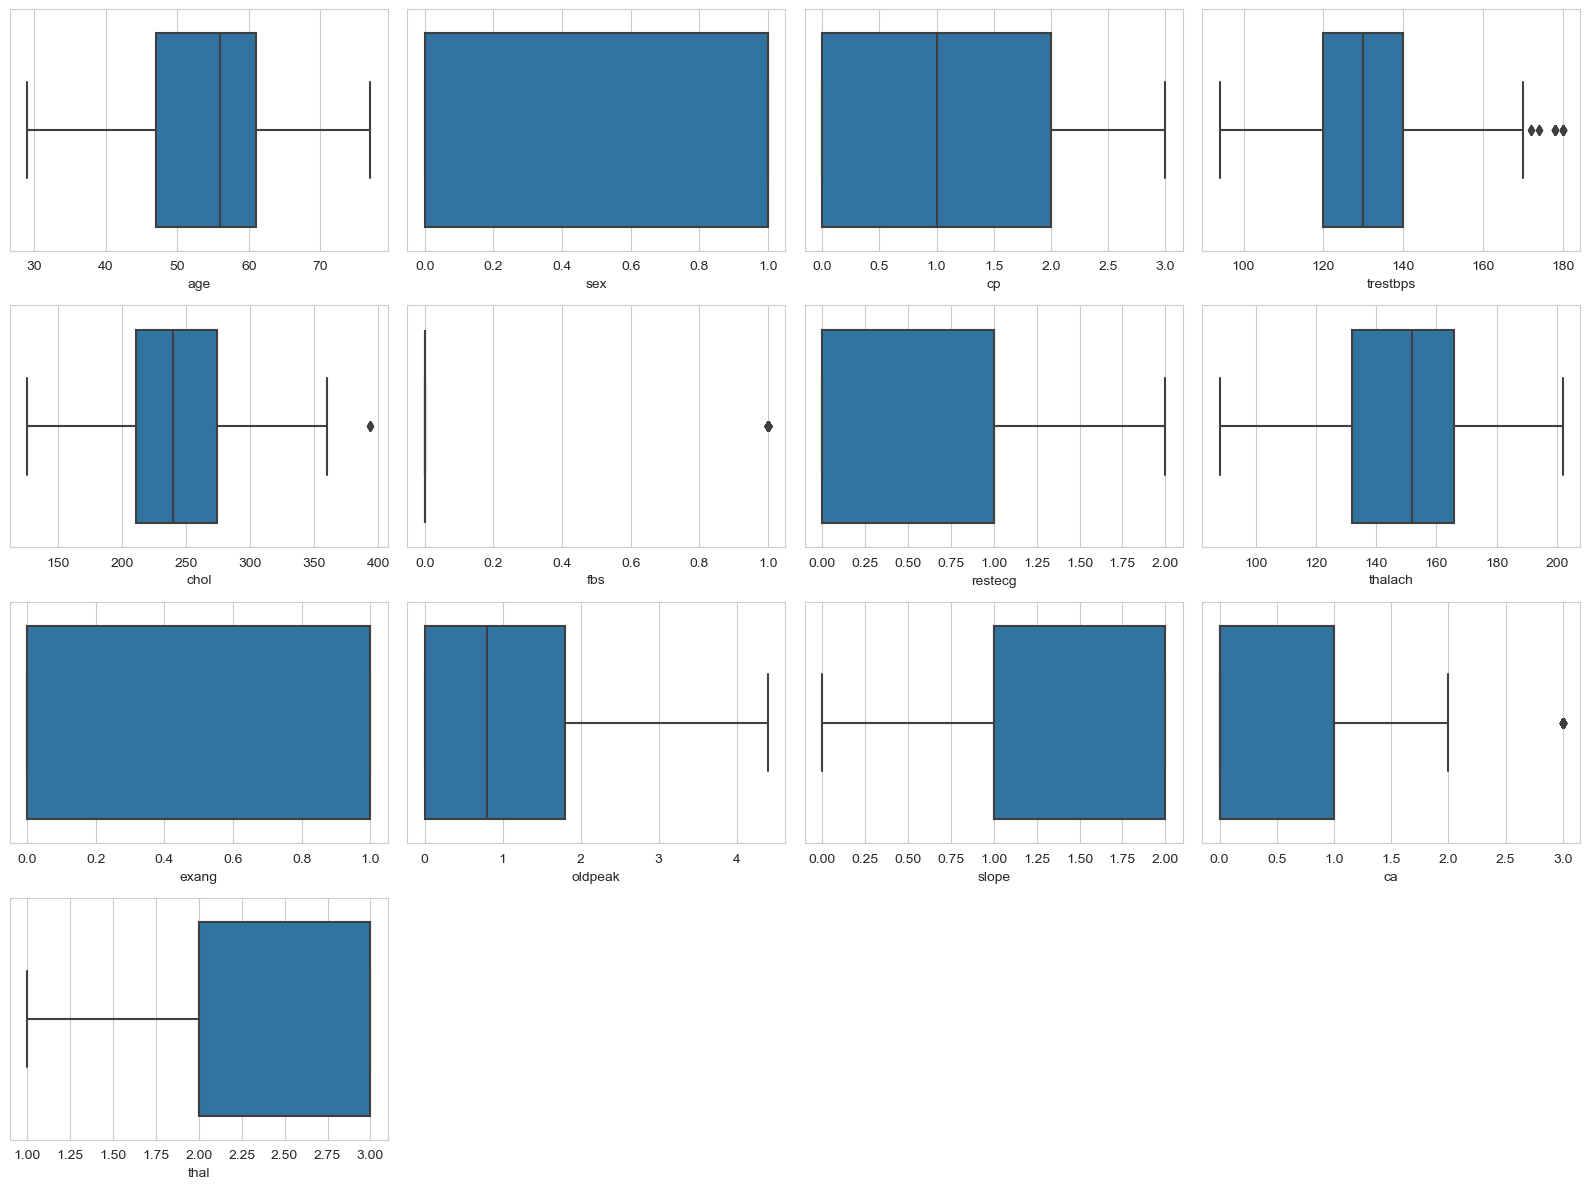

In [14]:
# Z-score normalization 
# Calculate Z-scores for each feature

z_scores = (data - data.mean()) / data.std()
threshold = 3    # Is a commonly used standard
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Check if there are any outliers
if outliers.any().any():
    print('Outliers detected in the dataset. Removing them...')
    
    # Remove outliers
    data = data[~outliers.any(axis=1)]
    data.reset_index(drop=True, inplace=True)
    
    print('Outliers removed. Data shape:', data.shape)

    # Univariate Analysis
    # List of columns to plot
    plt.figure(figsize=(16, 12))
    sns.set_style('whitegrid')

    columns_to_plot = ['age', 'sex', 'cp', 'trestbps', 'chol', 
                   'fbs', 'restecg', 'thalach', 'exang', 
                   'oldpeak', 'slope', 'ca', 'thal']

    for i, column in enumerate(columns_to_plot, start=1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=column, data=data)

    plt.tight_layout()
    plt.show()
else:
        print('No outliers detected in the dataset.')

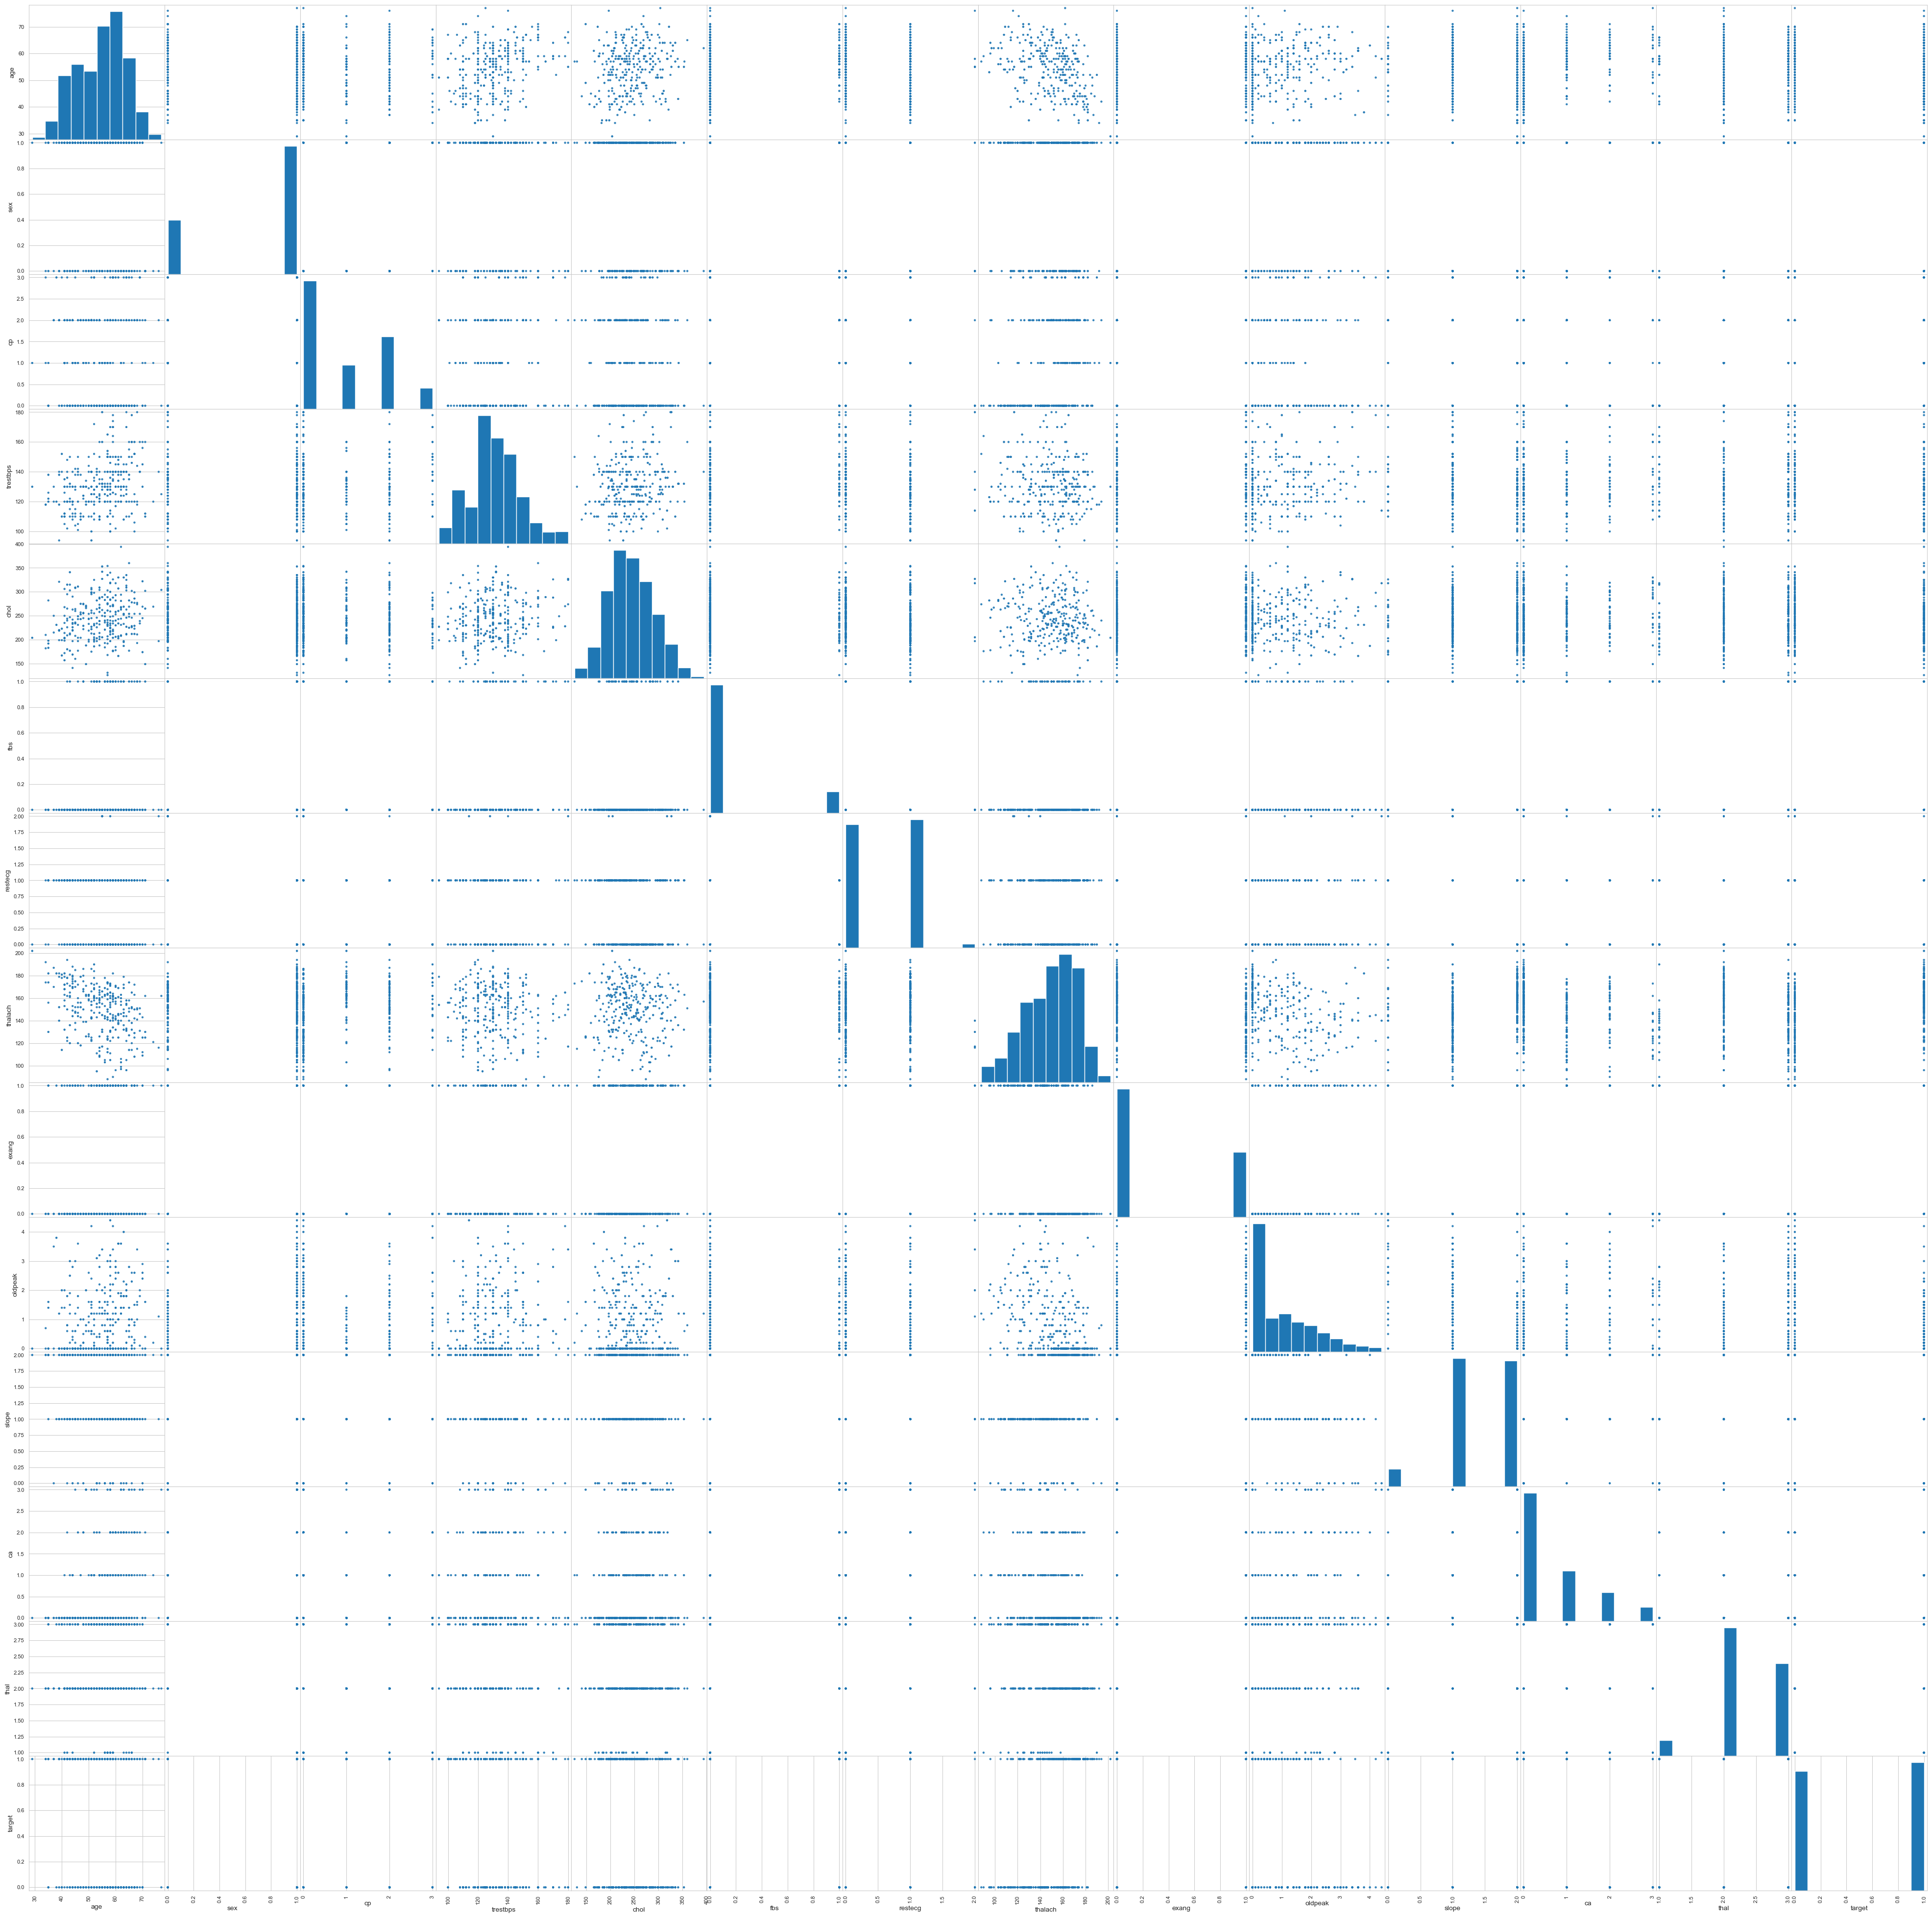

In [15]:
scatter_matrix(data,figsize=(50,50));

# We can come to various conclusion looking at these plots for example:
# If you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number 
# of pregnancies have lower insulin

In [16]:
# plt.figure(figsize=(15,10))
# sns.pairplot(data)
# plt.title("Looking for Insites in Data")
# plt.legend("Heart Disease")
# plt.tight_layout()
# plt.plot()

In [17]:
data.columns  # "Attribute"

# It doesn't require parentheses because it's an attribute, not a method.

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [18]:
# Analysis and exploration of categories of the "sex" feature
# check labels in "sex" feature الجنس | النوع

data['sex'].unique()

array([1, 0], dtype=int64)

In [19]:
data['sex'].value_counts()

sex
1    680
0    289
Name: count, dtype: int64

In [20]:
# The person's sex : جنس الشخص
# (0) => Female أنثى
# (1) => Male ذكر

In [21]:
data["sex"].replace({0:"Female", 1:"Male"}, inplace=True)

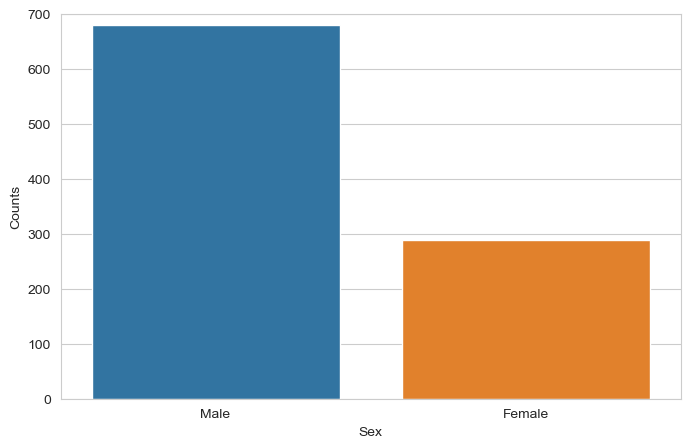

In [22]:
Target_counts = data['sex'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Sex')
plt.ylabel('Counts')
plt.ylim(0, 700)
plt.show()

In [23]:
# Analysis and exploration of categories of the "cp" feature
# check labels in "cp" feature  الألم في الصدر

data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [24]:
data['cp'].value_counts()

cp
0    468
2    264
1    160
3     77
Name: count, dtype: int64

In [25]:
# chest pain type : نوع الألم في الصدر
# (0) => asymptomatic بدون أعراض ظاهرة
# (1) => atypical angina الذبحة الصدرية غير النمطية
# (2) => non-angina pain ألم غير الذبحة الصدرية
# (3) => typical angina الذبحة الصدرية النموذجية

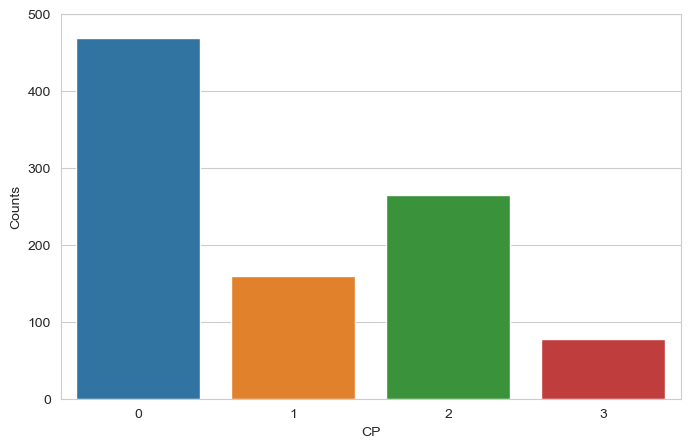

In [26]:
Target_counts = data['cp'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('CP')
plt.ylabel('Counts')
plt.ylim(0, 500)
plt.show()

In [27]:
# Analysis and exploration of categories of the "fbs" feature
# check labels in "fbs" feature السكر في الدم

data['fbs'].unique()

array([0, 1], dtype=int64)

In [28]:
data['fbs'].value_counts()

fbs
0    830
1    139
Name: count, dtype: int64

In [29]:
# The person's fasting blood sugar نسبة السكر في الدم صائماً لدى الشخص
# (0) => False [Less than or equal to 20 mg/dl]
# (1) => True  [greater than to 20 mg/dl]

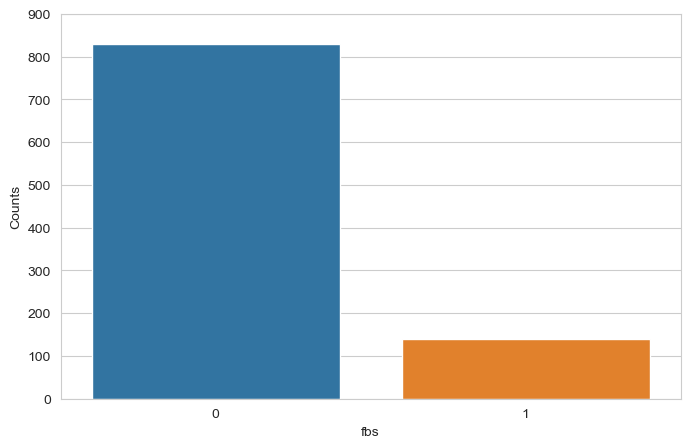

In [30]:
Target_counts = data['fbs'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('fbs')
plt.ylabel('Counts')
plt.ylim(0, 900)
plt.show()

In [31]:
# Analysis and exploration of categories of the "restecg" feature
# check labels in "restecg" feature نتائج تخطيط كهربية القلب

data['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [32]:
data['restecg'].value_counts()

restecg
1    486
0    468
2     15
Name: count, dtype: int64

In [33]:
# resting electrocardiographic results نتائج تخطيط كهربية القلب
# (0) => إظهار تضخم البطين الأيسر المحتمل أو المؤكد
# (1) => طبيعي
# (2) => وجود شذوذ

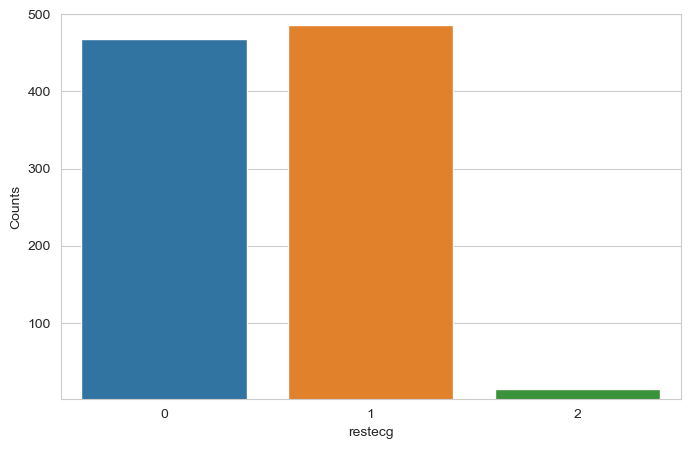

In [34]:
Target_counts = data['restecg'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('restecg')
plt.ylabel('Counts')
plt.ylim(1, 500)
plt.show()

In [35]:
# Analysis and exploration of categories of the "exang" feature
# check labels in "exang" feature ممارسة الذبحة الصدرية المستحثة

data['exang'].unique()

array([0, 1], dtype=int64)

In [36]:
data['exang'].value_counts()

exang
0    642
1    327
Name: count, dtype: int64

In [37]:
# ممارسة الذبحة الصدرية المستحثة
# (0) => No
# (1) => Yes

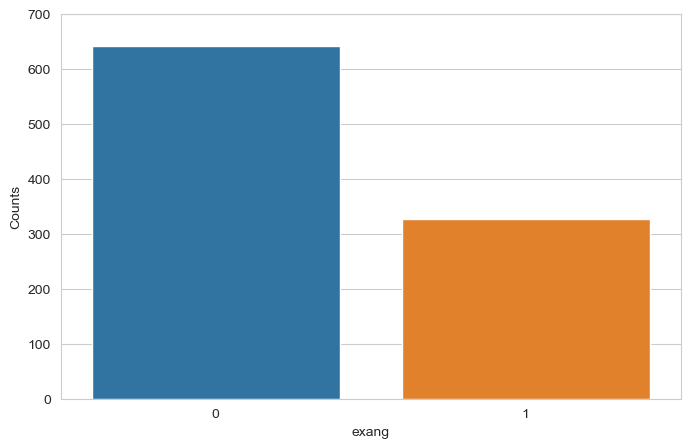

In [38]:
Target_counts = data['exang'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('exang')
plt.ylabel('Counts')
plt.ylim(0, 700)
plt.show()

In [39]:
# Analysis and exploration of categories of the "slope" feature
# check labels in "slope" feature منحدر الذروة

data['slope'].unique()

array([2, 0, 1], dtype=int64)

In [40]:
data['slope'].value_counts()

slope
1    457
2    449
0     63
Name: count, dtype: int64

In [41]:
# Slop : منحدر الذروة
# (0) => Down-Sloping
# (1) => Flat
# (2) => Up-Sloping

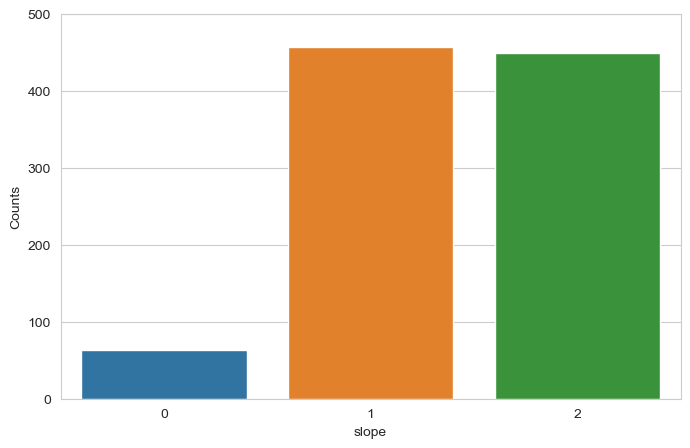

In [42]:
Target_counts = data['slope'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('slope')
plt.ylabel('Counts')
plt.ylim(0, 500)
plt.show()

In [43]:
# Analysis and exploration of categories of the "ca" feature
# check labels in "ca" feature عدد الأوعية الرئيسية

data['ca'].unique()

array([2, 0, 1, 3], dtype=int64)

In [44]:
data['ca'].value_counts()

ca
0    560
1    220
2    127
3     62
Name: count, dtype: int64

In [45]:
# عدد الأوعية الرئيسة
# From (0) to (3)

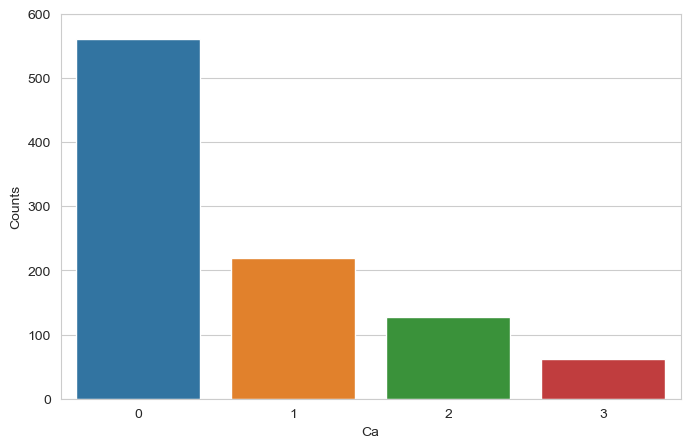

In [46]:
Target_counts = data['ca'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('Ca')
plt.ylabel('Counts')
plt.ylim(0, 600)
plt.show()

In [47]:
# Analysis and exploration of categories of the "thal" feature
# check labels in "thal" feature اضطراب في الدم
data['thal'].unique()

array([3, 2, 1], dtype=int64)

In [48]:
data['thal'].value_counts()

thal
2    526
3    379
1     64
Name: count, dtype: int64

In [49]:
# A blood disorder اضطراب في الدم
# (1) => عدم تدفق الدم في جزء ما من القلب
# (2) => تدفق الدم طبيعي
# (3) => لوحظ تدفق الدم ولكن ليس طبيعياً

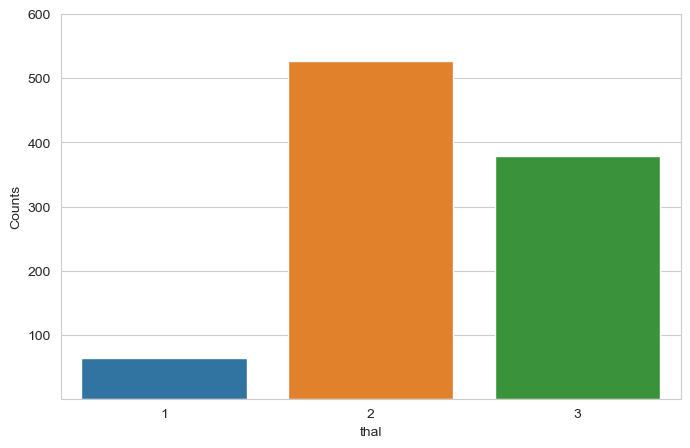

In [50]:
Target_counts = data['thal'].value_counts()

# Bivariate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=Target_counts.index, y=Target_counts.values)
plt.xlabel('thal')
plt.ylabel('Counts')
plt.ylim(1, 600)
plt.show()

In [51]:
# Analysis and exploration of categories of the "target" feature
# check labels in "target" feature
data['target'].unique()

array([0, 1], dtype=int64)

In [52]:
data['target'].value_counts()

# (0) => This person hasn't heart disease.
# (1) => This person has heart disease.

target
1    502
0    467
Name: count, dtype: int64

In [53]:
data["target"].replace({0:"This person hasn't heart disease", 1:"This person has heart disease"}, inplace=True)

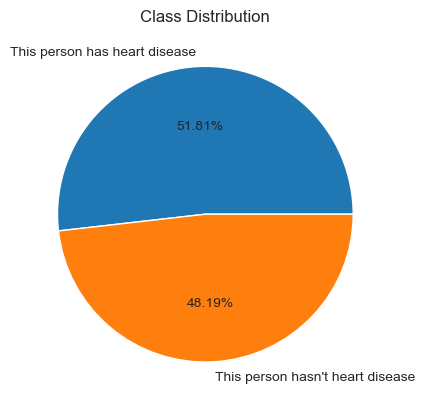

In [54]:
# Univariate Analysis
plt.pie(data.target.value_counts().values , labels=data.target.value_counts().index,autopct='%1.2f%%')
plt.title('Class Distribution')
plt.show()

# (0) => This person hasn't heart disease.
# (1) => This person has heart disease.

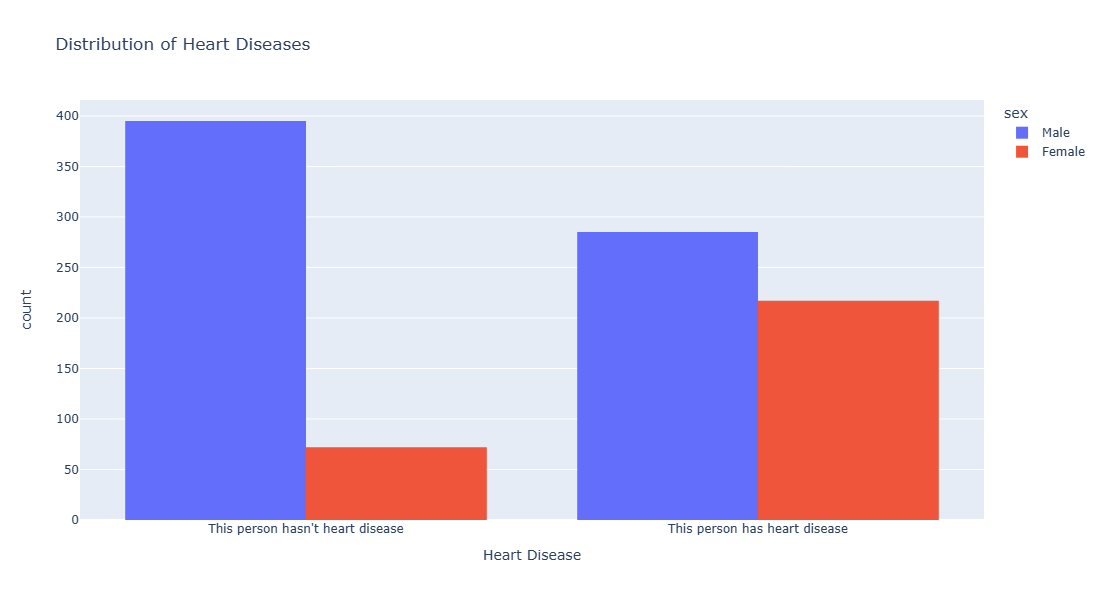

In [55]:
fig = px.histogram(data, x="target", color="sex", hover_data=data.columns, 
                   title="Distribution of Heart Diseases", barmode="group")

fig.update_layout(width=1000, height=600, xaxis_title="Heart Disease", yaxis_title="count")
fig.show()

In [56]:
data["sex"].replace({"Female":0, "Male":1}, inplace=True)
data["target"].replace({"This person hasn't heart disease":0, "This person has heart disease":1}, inplace=True)

In [57]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

data.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.077902 -0.059286  0.297992  0.183075  0.133062   
sex      -0.077902  1.000000 -0.047771 -0.057017 -0.138614  0.041548   
cp       -0.059286 -0.047771  1.000000  0.061996 -0.097779  0.102924   
trestbps  0.297992 -0.057017  0.061996  1.000000  0.142566  0.167518   
chol      0.183075 -0.138614 -0.097779  0.142566  1.000000  0.013029   
fbs       0.133062  0.041548  0.102924  0.167518  0.013029  1.000000   
restecg  -0.120585 -0.107043  0.038883 -0.099957 -0.095590 -0.094705   
thalach  -0.387504 -0.057927  0.297609 -0.064813 -0.041939 -0.009113   
exang     0.101872  0.145631 -0.390493  0.054314  0.085599  0.013031   
oldpeak   0.191232  0.155104 -0.135320  0.144384  0.038335  0.005646   
slope    -0.153518 -0.051484  0.090084 -0.097033  0.001309 -0.045372   
ca        0.370247  0.130724 -0.216786  0.060339  0.117465  0.156300   
thal      0.058987  0.235699 -0.157708  0.023259  0.051000 -0.020786   
target   -0.227225 -0.303739  0.408999 -0.114757 -0.112342 -0.023629   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.120585 -0.387504  0.101872  0.191232 -0.153518  0.370247   
sex      -0.107043 -0.057927  0.145631  0.155104 -0.051484  0.130724   
cp        0.038883  0.297609 -0.390493 -0.135320  0.090084 -0.216786   
trestbps -0.099957 -0.064813  0.054314  0.144384 -0.097033  0.060339   
chol     -0.095590 -0.041939  0.085599  0.038335  0.001309  0.117465   
fbs      -0.094705 -0.009113  0.013031  0.005646 -0.045372  0.156300   
restecg   1.000000  0.061232 -0.066541 -0.028290  0.081653 -0.095432   
thalach   0.061232  1.000000 -0.395719 -0.357793  0.386290 -0.299275   
exang    -0.066541 -0.395719  1.000000  0.319344 -0.248610  0.153337   
oldpeak  -0.028290 -0.357793  0.319344  1.000000 -0.542464  0.267879   
slope     0.081653  0.386290 -0.248610 -0.542464  1.000000 -0.083869   
ca       -0.095432 -0.299275  0.153337  0.267879 -0.083869  1.000000   
thal      0.004146 -0.120972  0.216089  0.165459 -0.058630  0.126366   
target    0.127580  0.429920 -0.429825 -0.431854  0.322791 -0.466639   

              thal    target  
age       0.058987 -0.227225  
sex       0.235699 -0.303739  
cp       -0.157708  0.408999  
trestbps  0.023259 -0.114757  
chol      0.051000 -0.112342  
fbs      -0.020786 -0.023629  
restecg   0.004146  0.127580  
thalach  -0.120972  0.429920  
exang     0.216089 -0.429825  
oldpeak   0.165459 -0.431854  
slope    -0.058630  0.322791  
ca        0.126366 -0.466639  
thal      1.000000 -0.352502  
target   -0.352502  1.000000

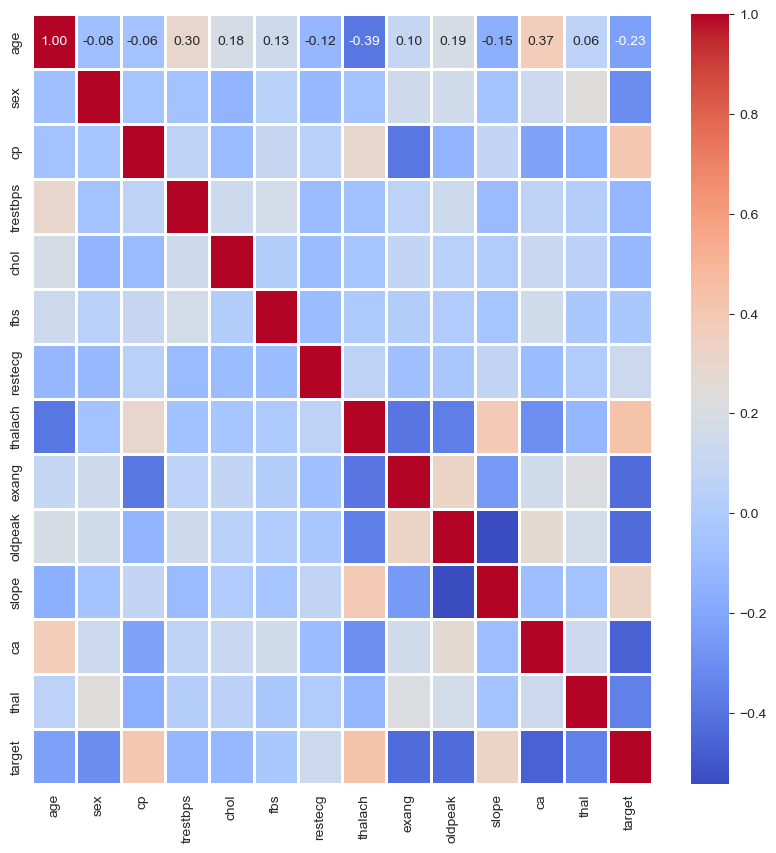

In [58]:
# Bivariate Analysis
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.9, fmt=".2f", cmap='coolwarm')
plt.show()

In [59]:
# The correlation between each feature and the "Outcome"
# Bivariate Analysis
corr = data[['age', 'sex', 'cp', 'trestbps','chol','fbs','restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']].corr()['target'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="coolwarm")

In [60]:
# Dropping feature/s based on the correlation
# These features are the least correlated with "target"

data.drop(['fbs','chol'], inplace=True, axis=1)

In [61]:
data.head() # Default : first 5 rows

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal  \
0   52    1   0       125        1      168      0      1.0      2   2     3   
1   53    1   0       140        0      155      1      3.1      0   0     3   
2   70    1   0       145        1      125      1      2.6      0   0     3   
3   61    1   0       148        1      161      0      0.0      2   1     3   
4   62    0   0       138        1      106      0      1.9      1   3     2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [62]:
data.tail() # Default : last 5 rows

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  \
964   59    1   1       140        1      164      1      0.0      2   0   
965   60    1   0       125        0      141      1      2.8      1   1   
966   47    1   0       110        0      118      1      1.0      1   1   
967   50    0   0       110        0      159      0      0.0      2   0   
968   54    1   0       120        1      113      0      1.4      1   1   

     thal  target  
964     2       1  
965     3       0  
966     2       0  
967     2       1  
968     3       0

In [63]:
data.shape # Dimensions (rows, columns)

(969, 12)

# <font size= '6' color='DodgerBlue'>Split the dataset into features and target</font>

In [64]:
# X Data
X = data.drop(['target'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['target']
print('y shape is : ' , y.shape)

X shape is :  (969, 11)

y shape is :  (969,)


# <font size= '6' color='DodgerBlue'>Split the dataset into training and validation sets</font>

In [65]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.23, random_state=42, shuffle=True)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (746, 11)
X_val shape is  (223, 11)
y_train shape is  (746,)
y_val shape is  (223,)


# <font size= '6' color='DodgerBlue'>Feature Scaling</font>

In [66]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# <font size= '6' color='DodgerBlue'>Applying "Logistic Regression" Algorithm</font>

In [67]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train, y_train)
y_train_pred_LR = Model_LR.predict(X_train)
y_val_pred_LR = Model_LR.predict(X_val)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_LR)
Val_Accuracy_LR = accuracy_score(y_val, y_val_pred_LR)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Validating accuracy: {Val_Accuracy_LR*100:.2f} %')

Training accuracy: 86.33 %
Validating accuracy: 87.00 %


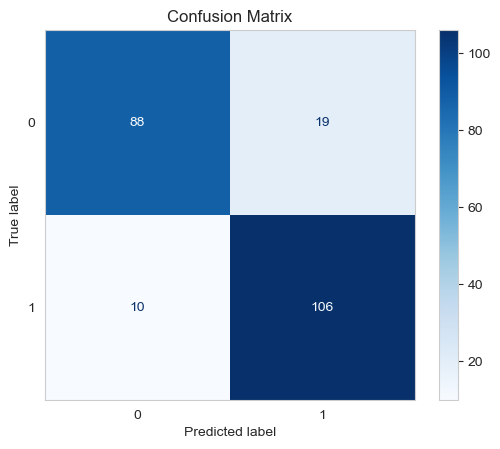

In [68]:
# Model Evaluation
# Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_LR)
disp = ConfusionMatrixDisplay(CM, display_labels=data['target'].unique())
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.title('Confusion Matrix')
plt.show()

In [69]:
print(classification_report(y_val, y_val_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       107
           1       0.85      0.91      0.88       116

    accuracy                           0.87       223
   macro avg       0.87      0.87      0.87       223
weighted avg       0.87      0.87      0.87       223



# <font size= '6' color='DodgerBlue'>Applying "Support Vector Machine" Algorithm</font>

In [70]:
Model_SVC = SVC(kernel='linear')
Model_SVC.fit(X_train, y_train)
y_train_pred_SVC = Model_SVC.predict(X_train)
y_val_pred_SVC = Model_SVC.predict(X_val)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_SVC)
Val_Accuracy_SVC = accuracy_score(y_val, y_val_pred_SVC)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Validating accuracy: {Val_Accuracy_SVC*100:.2f} %')

Training accuracy: 86.46 %
Validating accuracy: 87.89 %


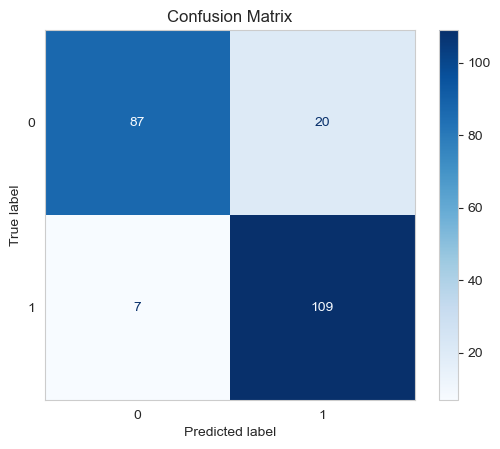

In [71]:
# Model Evaluation
# Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_SVC)
disp = ConfusionMatrixDisplay(CM, display_labels=data['target'].unique())
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.title('Confusion Matrix')
plt.show()

In [72]:
print(classification_report(y_val, y_val_pred_SVC))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       107
           1       0.84      0.94      0.89       116

    accuracy                           0.88       223
   macro avg       0.89      0.88      0.88       223
weighted avg       0.88      0.88      0.88       223



# <font size= '6' color='DodgerBlue'>Applying "Decision Tree" Algorithm</font>

In [73]:
Model_DT = DecisionTreeClassifier(random_state=42, max_depth=7)
Model_DT.fit(X_train, y_train)
y_train_pred_DT = Model_DT.predict(X_train)
y_val_pred_DT = Model_DT.predict(X_val)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_DT)
Val_Accuracy_DT = accuracy_score(y_val, y_val_pred_DT)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Validating accuracy: {Val_Accuracy_DT*100:.2f} %')

Training accuracy: 96.78 %
Validating accuracy: 95.52 %


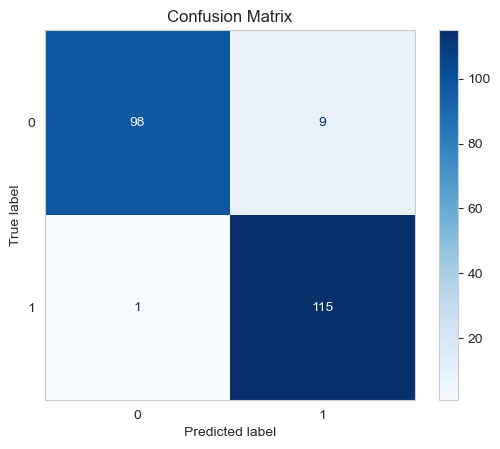

In [74]:
# Model Evaluation
# Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_DT)
disp = ConfusionMatrixDisplay(CM, display_labels=data['target'].unique())
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.title('Confusion Matrix')
plt.show()

In [75]:
print(classification_report(y_val, y_val_pred_DT))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       107
           1       0.93      0.99      0.96       116

    accuracy                           0.96       223
   macro avg       0.96      0.95      0.95       223
weighted avg       0.96      0.96      0.96       223



# <font size= '6' color='DodgerBlue'>Applying "Random Forest" Algorithm</font>

In [76]:
Model_RF = RandomForestClassifier(random_state=42, max_depth=6)
Model_RF.fit(X_train, y_train)
y_train_pred_RF = Model_RF.predict(X_train)
y_val_pred_RF = Model_RF.predict(X_val)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_RF)
Val_Accuracy_RF = accuracy_score(y_val, y_val_pred_RF)
print(f'Training accuracy: {Train_Accuracy*100:.2f} %')
print(f'Validating accuracy: {Val_Accuracy_RF*100:.2f} %')

Training accuracy: 97.45 %
Validating accuracy: 97.31 %


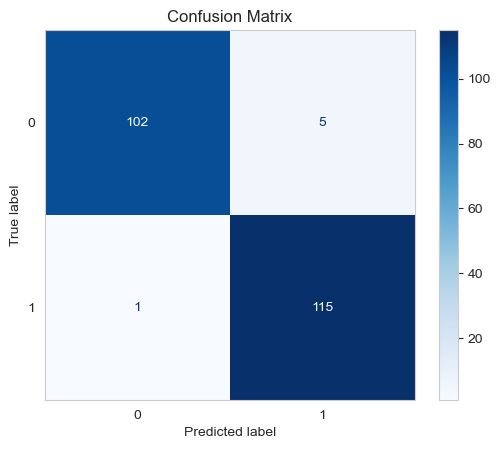

In [77]:
# Model Evaluation
# Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_RF)
disp = ConfusionMatrixDisplay(CM, display_labels=data['target'].unique())
fig, ax = plt.subplots()
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.title('Confusion Matrix')
plt.show()

In [78]:
print(classification_report(y_val, y_val_pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       107
           1       0.96      0.99      0.97       116

    accuracy                           0.97       223
   macro avg       0.97      0.97      0.97       223
weighted avg       0.97      0.97      0.97       223



# <font size= '6' color='DodgerBlue'>Models Test Scores & Evaluation</font>

In [79]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree',
                                 'Random Forest'],
                       'Score': [Val_Accuracy_LR, Val_Accuracy_SVC, Val_Accuracy_DT, Val_Accuracy_RF]})

models.sort_values(by='Score', ascending=False).style.background_gradient(cmap='Blues')

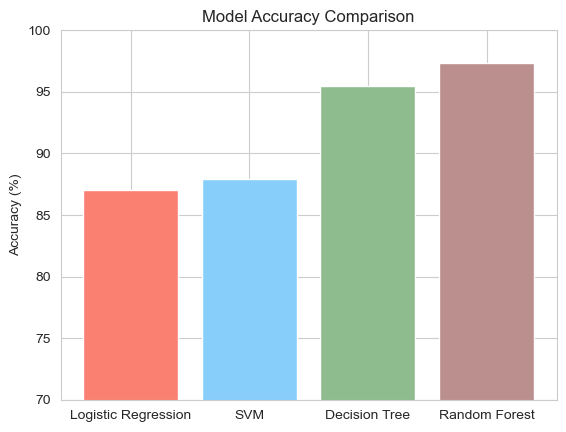

In [80]:
Classifiers = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
Accuracies = [(Val_Accuracy_LR * 100), (Val_Accuracy_SVC * 100), (Val_Accuracy_DT * 100),
              (Val_Accuracy_RF * 100)]

plt.bar(Classifiers, Accuracies, color=['Salmon', 'LightSkyBlue', 'DarkSeaGreen', 'RosyBrown'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(70, 100)
plt.grid(axis='y', alpha=1)
plt.show()

<center><img src="https://cdn.dribbble.com/users/126069/screenshots/2253470/screengif7.gif" style='width: 10%:'></center>